<center> <img src=https://storage.googleapis.com/kaggle-competitions/kaggle/3333/media/taxi_meter.png align="right" width="300"/> </center>
    
Вам предстоит решить настоящую задачу машинного обучения, направленную на автоматизацию бизнес процессов. Мы построим модель, которая будет предсказывать общую продолжительность поездки такси в Нью-Йорке. 

Представьте вы заказываете такси из одной точки Нью-Йорка в другую, причем не обязательно конечная точка должна находиться в пределах города. Сколько вы должны будете за нее заплатить? Известно, что стоимость такси в США  рассчитывается на основе фиксированной ставки + тарифная стоимость, величина которой зависит от времени и расстояния. Тарифы варьируются в зависимости от города.

В свою очередь время поездки зависит от множества факторов таких как, откуда и куда вы едете, в какое время суток вы совершаете вашу поездку, погодных условий и так далее. 

Таким образом, если мы разработаем алгоритм, способный определять длительность поездки, мы сможем прогнозировать ее стоимость самым тривиальным образом, например, просто умножая стоимость на заданный тариф. 
Сервисы такси хранят огромные объёмы информации о поездках, включая такие данные как конечная, начальная точка маршрута, дата поездки и ее длительность. Эти данные можно использовать для того, чтобы прогнозировать длительность поездки в автоматическом режиме с привлечением искусственного интеллекта.

**Бизнес-задача:** определить характеристики и с их помощью спрогнозировать длительность поездки такси.

**Техническая задача для вас как для специалиста в Data Science:** построить модель машинного обучения, которая на основе предложенных характеристик клиента будет предсказывать числовой признак - время поездки такси. То есть решить задачу регрессии.

**Основные цели проекта:**
1. Сформировать набор данных на основе нескольких источников информации
2. Спроектировать новые признаки с помощью Feature Engineering и выявить наиболее значимые при построении модели
3. Исследовать предоставленные данные и выявить закономерности
4. Построить несколько моделей и выбрать из них наилучшую по заданной метрике
5. Спроектировать процесс предсказания времени длительности поездки для новых данных

Загрузить свое решение на платформу Kaggle, тем самым поучаствовав в настоящем Data Science соревновании.
Во время выполнения проекта вы отработаете навыки работы с несколькими источниками данных, генерации признаков, разведывательного анализа и визуализации данных, отбора признаков и, конечно же, построения моделей машинного обучения!


## 1. Постановка задачи

## 2. Знакомство с данными, базовый анализ и расширение данных

Начнём наше исследование со знакомства с предоставленными данными. А также подгрузим дополнительные источники данных и расширим наш исходный датасет. 


Заранее импортируем модули, которые нам понадобятся для решения задачи:

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from scipy import stats
from sklearn import linear_model
from sklearn import preprocessing
from sklearn import model_selection
from sklearn import tree
from sklearn import ensemble
from sklearn import metrics
from sklearn import cluster
from sklearn import feature_selection

Прочитаем наш файл с исходными данными:

In [3]:
taxi_data = pd.read_csv("data/train.csv")
print('Train data shape: {}'.format(taxi_data.shape))
taxi_data.head()

Train data shape: (1458644, 11)


,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


Итак, у нас с вами есть данные о почти 1.5 миллионах поездок и 11 характеристиках, которые описывают каждую из поездок. 

Мы условно разделили признаки нескольких групп. Каждой из групп мы в дальнейшем уделим отдельное внимание.

**Данные о клиенте и таксопарке:**
* id - уникальный идентификатор поездки
* vendor_id - уникальный идентификатор поставщика (таксопарка), связанного с записью поездки

**Временные характеристики:**
* pickup_datetime - дата и время, когда был включен счетчик поездки
* dropoff_datetime - дата и время, когда счетчик был отключен

**Географическая информация:**
* pickup_longitude -  долгота, на которой был включен счетчик
* pickup_latitude - широта, на которой был включен счетчик
* dropoff_longitude - долгота, на которой счетчик был отключен
* dropoff_latitude - широта, на которой счетчик был отключен

**Прочие признаки:**
* passenger_count - количество пассажиров в транспортном средстве (введенное водителем значение)
* store_and_fwd_flag - флаг, который указывает, сохранилась ли запись о поездке в памяти транспортного средства перед отправкой поставщику. Y - хранить и пересылать, N - не хранить и не пересылать поездку.

**Целевой признак:**
* trip_duration - продолжительность поездки в секундах


Для начала мы проведем базовый анализ того, насколько данные готовы к дальнейшей предобработке и анализу. 

### Задание 2.1
Для начала посмотрим на временные рамки, в которых мы работаем с данными.

Переведите признак pickup_datetime в тип данных datetime с форматом год-месяц-день час:минута:секунда (в функции pd.to_datetime() параметр format='%Y-%m-%d %H:%M:%S'). 

Определите временные рамки (без учета времени), за которые представлены данные.

In [4]:
taxi_data['pickup_datetime'] = pd.to_datetime(taxi_data['pickup_datetime'], format='%Y-%m-%d %H:%M:%S')
taxi_data['dropoff_datetime'] = pd.to_datetime(taxi_data['dropoff_datetime'],format = '%Y-%m-%d %H:%M:%S')

print(taxi_data['pickup_datetime'].min(), "-", taxi_data['pickup_datetime'].max())

2016-01-01 00:00:17 - 2016-06-30 23:59:39


### Задание 2.2
Посмотрим на пропуски. 
Сколько пропущенных значений присутствует в данных (суммарно по всем столбцам таблицы)?

In [5]:
taxi_data.isnull().sum()

id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       0
dropoff_longitude     0
dropoff_latitude      0
store_and_fwd_flag    0
trip_duration         0
dtype: int64

### Задание 2.3
Посмотрим на статистические характеристики некоторых признаков. 

а) Сколько уникальных таксопарков присутствует в данных?

б) Каково максимальное количество пассажиров?

в) Чему равна средняя и медианная длительность поездки? Ответ приведите в секундах и округлите до целого.

г) Чему равно минимальное и максимальное время поездки (в секундах)?


In [6]:
print(" Колличество уникальных таксопарков: {:.0f} \n".format(taxi_data['vendor_id'].nunique()),
      "Максимальное колличество пассажиров: {:.0f} \n".format(taxi_data['passenger_count'].max()),
      "Средняя длительность поездки в секундах: {:.0f} \n".format(taxi_data['trip_duration'].mean()),
      "Медианная длительность поездки в секундах: {:.0f} \n".format(taxi_data['trip_duration'].median()),
      "Максимальная длительность поездки в секундах: {:.0f} \n".format(taxi_data['trip_duration'].max()),
      "Минимальная длительность поездки в секундах: {:.0f} \n".format(taxi_data['trip_duration'].min()))

 Колличество уникальных таксопарков: 2 
 Максимальное колличество пассажиров: 9 
 Средняя длительность поездки в секундах: 959 
 Медианная длительность поездки в секундах: 662 
 Максимальная длительность поездки в секундах: 3526282 
 Минимальная длительность поездки в секундах: 1 



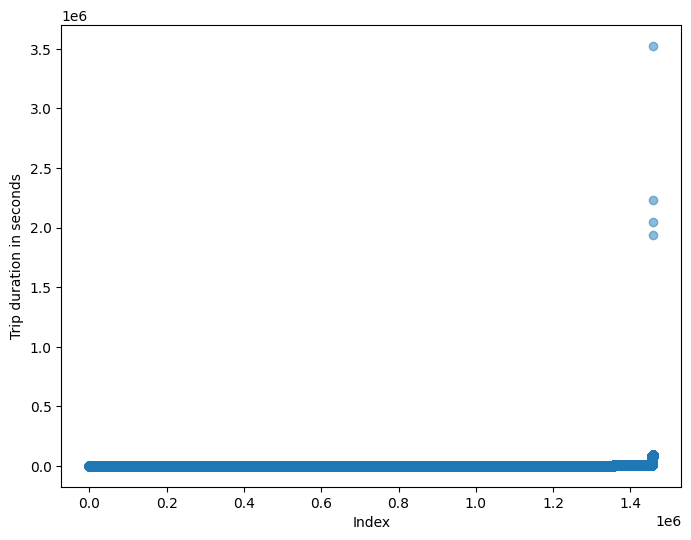

In [7]:
#Визуализируем
target = taxi_data['trip_duration']
f = plt.figure(figsize=(8,6))
plt.scatter(range(len(target)), np.sort(target.values), alpha=0.5)
plt.xlabel('Index')
plt.ylabel('Trip duration in seconds')
plt.show()

<AxesSubplot: >

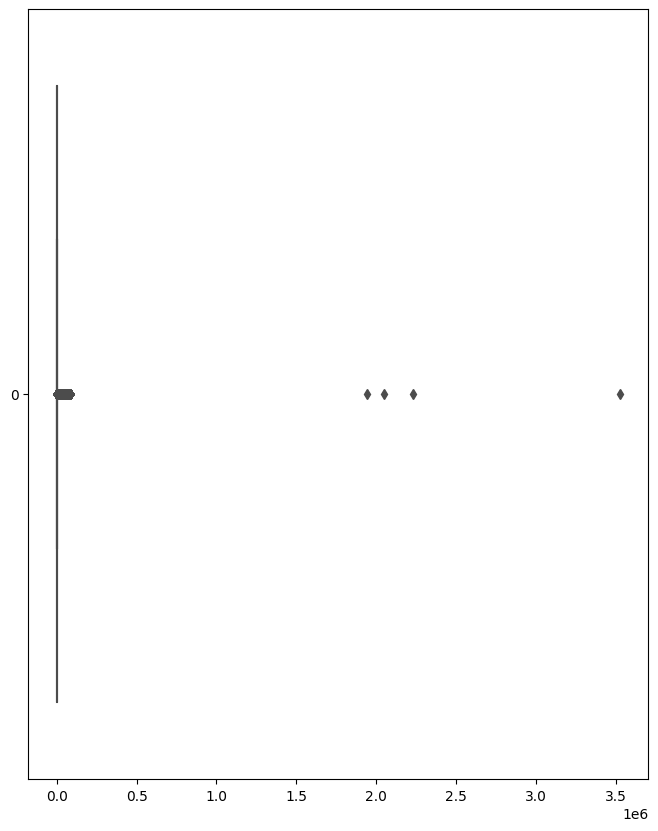

In [8]:
fig, ax = plt.subplots(figsize=(8, 10)) 
sns.boxplot(data=taxi_data['trip_duration'], ax=ax, orient='h', palette='Wistia')

Видим четыре явных выброса 

Займемся расширением исходного набора данных как с помощью внешних источников, так и с помощью манипуляций над имеющимися в данных признаками. 


### Задание 2.4
Реализуйте функцию add_datetime_features(), которая принимает на вход таблицу с данными о поездках (DataFrame) и возвращает ту же таблицу с добавленными в нее 3 столбцами:
* pickup_date - дата включения счетчика - начала поездки (без времени);
* pickup_hour - час дня включения счетчика;
* pickup_day_of_week - наименование дня недели, в который был включен счетчик.

а) Сколько поездок было совершено в субботу?

б) Сколько поездок в среднем совершается в день? Ответ округлите до целого

In [9]:
def add_datetime_features(df):
    """
    Функция добавляющая в таблицу с данными о поездках:
        - дату включения счётчика
        - час влключеня счётчика
        - день недели включения счётчика
    
    Args:
        df (DataFrame): исходный набор данных
    
    Returns:
        df (DataFrame): дополненный набор данных
    """
    df['pickup_date'] = df['pickup_datetime'].dt.date
    df['pickup_hour'] = df['pickup_datetime'].dt.hour
    df['pickup_day_of_week'] = df['pickup_datetime'].dt.dayofweek
    return df

# добавляем данные
taxi_data = add_datetime_features(taxi_data)

# рассчитываем показатели
mask = taxi_data['pickup_day_of_week'] == 5

mean_per_day = taxi_data.shape[0] / taxi_data['pickup_date'].nunique()

print(" Количество поездок, совершенных в субботу: {:.0f} \n".format(taxi_data[mask].shape[0]),
      "Количество поездок в среднем совершается в день: {:.0f}".format(mean_per_day))

 Количество поездок, совершенных в субботу: 220868 
 Количество поездок в среднем совершается в день: 8015


### Задание 2.5
Реализуйте функцию add_holiday_features(), которая принимает на вход две таблицы: 
* таблицу с данными о поездках;
* таблицу с данными о праздничных днях;

и возвращает обновленную таблицу с данными о поездках с добавленным в нее столбцом pickup_holiday - бинарным признаком того, начата ли поездка в праздничный день или нет (1 - да, 0 - нет). 

Чему равна медианная длительность поездки на такси в праздничные дни? Ответ приведите в секундах, округлив до целого.


In [10]:
holiday_data = pd.read_csv('data/holiday_data.csv', sep=';')

# реализуем функцию
def add_holiday_features(df_taxi, df_holiday):
    """
    Функция добавляющая в таблицу с данными о поездках
    бинарный признак - начата ли поездка в праздничный день.
    
    Args:
        df_taxi (DataFrame): таблица с данными о поездках
        df_holiday (DataFrame): таблица с праздничными датами
    
    Returns:
        df_taxi (DataFrame): дополненный набор данных
    """    
    df_taxi['pickup_holiday'] = df_taxi['pickup_date'].apply(
        lambda x: 1 if str(x) in df_holiday['date'].values else 0
    )
    return df_taxi


# добавляем данные
taxi_data = add_holiday_features(taxi_data, holiday_data)


# вычисляем длительность поездки
mask = taxi_data['pickup_holiday'] == 1


print("Медианная длительность поезди в праздничные дни: {:.0f}" .format(taxi_data[mask]['trip_duration'].median()))


Медианная длительность поезди в праздничные дни: 585


### Задание 2.6
Теперь, когда мы разобрались с временными характеристиками, переходим к географическим.

В данных есть столбцы, содержащие информацию о широте и долготе. Из них можно извлечь очень много полезной информации.

Например, зная широту и долготу начальной и конечной точек маршрута, мы можем воспользоваться OSRM API.

OSRM (Open Source Routing Machine) — это открытый бесплатный ресурс, который активно используется во многих сервисах, предполагающих построение кратчайшего маршрута. Он позволяет не только построить оптимальный кусочно-линейный путь из точки А в точку B, но также узнать его примерную длительность, длину, а также подробную информацию о количестве шагов, которые необходимо преодолеть по пути (количество поворотов).


Реализуйте функцию add_osrm_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными из OSRM;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 3 столбцами:
* total_distance;
* total_travel_time;
* number_of_steps.

а) Чему равна разница (в секундах) между медианной длительностью поездки в данных и медианной длительностью поездки, полученной из OSRM? 

В результате объединения таблиц у вас должны были получиться пропуски в столбцах с информацией из OSRM API. Это связано с тем, что для некоторых поездок не удалось выгрузить данные из веб источника. 

б) Сколько пропусков содержится в столбцах с информацией из OSRM API после объединения таблиц?

In [11]:
osrm_data = pd.read_csv('data/osrm_data_train.csv')
osrm_data.head()

,id,starting_street,end_street,total_distance,total_travel_time,number_of_steps,street_for_each_step,distance_per_step,travel_time_per_step,step_maneuvers,step_direction,step_location_list
0,id2875421,Columbus Circle,East 65th Street,2009.1,164.9,5,Columbus Circle|Central Park West|65th Street ...,0|576.4|885.6|547.1|0,0|61.1|60.1|43.7|0,depart|rotary|turn|new name|arrive,left|straight|right|straight|arrive,"-73.982316,40.767869|-73.981997,40.767688|-73...."
1,id2377394,2nd Avenue,Washington Square West,2513.2,332.0,6,2nd Avenue|East 13th Street|5th Avenue|Washing...,877.3|836.5|496.1|164.2|139.1|0,111.7|109|69.9|25.8|15.6|0,depart|turn|turn|end of road|continue|arrive,none|right|left|right|left|arrive,"-73.980429,40.73857|-73.985444,40.731658|-73.9..."
2,id3504673,Greenwich Street,Broadway,1779.4,235.8,4,Greenwich Street|Park Place|Broadway|Broadway,644.2|379.9|755.3|0,80.5|50.8|104.5|0,depart|turn|end of road|arrive,left|left|right|arrive,"-74.010145,40.719982|-74.011527,40.714294|-74...."
3,id2181028,Broadway,West 81st Street,1614.9,140.1,5,Broadway|West 86th Street|Columbus Avenue|West...,617|427.4|412.2|158.3|0,56|36|37.8|10.3|0,depart|turn|turn|turn|arrive,right|left|right|left|arrive,"-73.972998,40.793187|-73.976607,40.788361|-73...."
4,id0801584,Lexington Avenue,West 31st Street,1393.5,189.4,5,Lexington Avenue|East 27th Street|Madison Aven...,18.9|311.9|313.3|749.4|0,6.3|42.9|48.4|91.8|0,depart|turn|turn|turn|arrive,right|right|right|left|arrive,"-73.982805,40.742173|-73.982914,40.742024|-73...."


In [12]:
def add_osrm_features(df_taxi, df_osrm):
    """
    Функция добавляющая в таблицу с данными о поездках данные из OSRM:
        - кратчайшее дорожное расстояние
        - наименьшее время поездки
        - количество дискретных шагов
    
    Args:
        df_taxi (DataFrame): таблица с данными о поездках
        df_osrm (DataFrame): данные из OSRM (Open Source Routing Machine)
    
    Returns:
        df_taxi (DataFrame): дополненный набор данных
    """
    df_osrm = df_osrm[
        ['id', 'total_distance', 'total_travel_time', 'number_of_steps']
    ]
    return df_taxi.merge(df_osrm, on = 'id', how = 'left')

# добавляем данные
taxi_data = add_osrm_features(taxi_data, osrm_data)

# рассчитываем показатели
median_time_delta = (
    taxi_data['trip_duration'].median()
    - taxi_data['total_travel_time'].median()
)

print("Разница в секундах: {:.0f}" .format(median_time_delta))

cols_null_count = taxi_data.isnull().sum()
cols_with_null = cols_null_count[cols_null_count > 0]

print('Количество пропусков по колонкам:\n', cols_with_null)

Разница в секундах: 372
Количество пропусков по колонкам:
 total_distance       1
total_travel_time    1
number_of_steps      1
dtype: int64


In [13]:
# теперь посмотрим на количество строк, в которых есть пропуски
a = taxi_data.isnull().sum(axis =1)
a[a>0]
# всего одна строка

1133561    3
dtype: int64

С помощью географических характеристик можно извлечь ещё немного информации. Если рассматривать Землю как сферу, то, зная широту и долготу начальной и конечной точек маршрута, можно вычислить географическое расстояние между точками на сфере, а также узнать направление движения автомобиля.

Введём в наш анализ расстояние по формуле гаверсинуса. 

Данная формула определяет кратчайшее расстояние между двумя точками на сфере, если известны широта и долгота каждой из точек. Геометрически это длина кратчайшей дуги, связывающей точки на сфере.

А расстояние, вычисляемое в OSRM, — это кратчайший суммарный путь, пройденный по дорожным разметкам.
Далее, зная начальную и конечную точку маршрута, мы можем вычислить направление движения автомобиля (угол пеленга) по формуле:
Пусть есть две точки с географическими координатами  
$$x{1} = (φ{1},λ{1})$$
 и 
$$x{2} = (φ{2},λ{2})$$

где

φ1 и λ1 — широта (latitude) и долгота (longitude) первой точки маршрута (в радианах);

φ2 и λ2   — широта (latitude) и долгота (longitude) второй точки маршрута (в радианах).

Далее, зная начальную и конечную точку маршрута, мы можем вычислить направление движения автомобиля (угол пеленга) по формуле:

 $$α  = arctg\frac{sin(λ{1} - λ{2})cos(φ{2})}{cos(φ{1})sin(φ{2})-sin(φ{1})cosφ{2}cos(λ{2} - λ{1})}$$


где α - угол направления движения от первой точки ко второй (может измеряться как в радианах, так и в градусах).


В интернете можно найти множество реализаций введённых нами формул на разных языках, в том числе на Python. Мы предлагаем вам воспользоваться следующими функциями:

- get_haversine_distance — функция для вычисления расстояния по формуле гаверсинуса (в километрах);
- get_angle_direction — функция для вычисления угла направления движения (в градусах).

Каждая из функций имеет четыре аргумента:

- lat1 и lng1 — векторы-столбцы с широтой и долготой первой точки;
- lat2 и lng2 — векторы-столбцы с широтой и долготой второй точки.


In [14]:
def get_haversine_distance(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # радиус земли в километрах
    EARTH_RADIUS = 6371 
    # считаем кратчайшее расстояние h по формуле Хаверсина
    lat_delta = lat2 - lat1
    lng_delta = lng2 - lng1
    d = np.sin(lat_delta * 0.5) ** 2 + np.cos(lat1) * np.cos(lat2) * np.sin(lng_delta * 0.5) ** 2
    h = 2 * EARTH_RADIUS * np.arcsin(np.sqrt(d))
    return h

def get_angle_direction(lat1, lng1, lat2, lng2):
    # переводим углы в радианы
    lat1, lng1, lat2, lng2 = map(np.radians, (lat1, lng1, lat2, lng2))
    # считаем угол направления движения alpha по формуле угла пеленга
    lng_delta_rad = lng2 - lng1
    y = np.sin(lng_delta_rad) * np.cos(lat2)
    x = np.cos(lat1) * np.sin(lat2) - np.sin(lat1) * np.cos(lat2) * np.cos(lng_delta_rad)
    alpha = np.degrees(np.arctan2(y, x))
    return alpha

### Задание 2.7.
Реализуйте функцию add_geographical_features(), которая принимает на вход таблицу с данными о поездках и возвращает обновленную таблицу с добавленными в нее 2 столбцами:
* haversine_distance - расстояние Хаверсина между точкой, в которой был включен счетчик, и точкой, в которой счетчик был выключен;
* direction - направление движения из точки, в которой был включен счетчик, в точку, в которой счетчик был выключен.

Чему равно медианное расстояние Хаверсина поездок (в киллометрах)? Ответ округлите до сотых.


In [15]:
# реализуем функцию
def add_geographical_features(df):
    """
    Функция добавляющая в таблицу с данными о поездках:
        - расстояние Хаверсина
        - направление движения
    
    Args:
        df (DataFrame): исходный набор данных
    
    Returns:
        df (DataFrame): дополненный набор данных
    """
    df['haversine_distance'] = get_haversine_distance(
        lat1 = df['pickup_latitude'],
        lng1 = df['pickup_longitude'],
        lat2 = df['dropoff_latitude'],
        lng2 = df['dropoff_longitude']
    )
    df['direction'] = get_angle_direction(
        lat1 = df['pickup_latitude'],
        lng1 = df['pickup_longitude'],
        lat2 = df['dropoff_latitude'],
        lng2 = df['dropoff_longitude']
    )
    return df

taxi_data = add_geographical_features(taxi_data)


print("Медианное расстояние Хаверсина: {:.2f}" .format(taxi_data['haversine_distance'].median()))

Медианное расстояние Хаверсина: 2.09


### Задание 2.8.
Следующая методика манипуляций с географическими данными — это применение кластеризации по географическим координатам. Идея заключается в том, чтобы сгруппировать все поездки в зависимости от координат начала и конца поездки с помощью методов кластеризации, тем самым добавив информацию о районах, в которых находятся точки старта и конца поездки.

→ Гипотеза состоит в том, что длительность поездки будет зависеть от того, к какому географическому кластеру будет принадлежать поездка.

В качестве метода кластеризации воспользуемся алгоритмом K-Means. Возьмём десять кластеров и обучим его на данных, сформированных из широты и долготы всех точек начала и конца поездок.

In [16]:
# Создаём обучающую выборку из географических координат всех точек
coords = np.hstack((taxi_data[['pickup_latitude', 'pickup_longitude']],
                    taxi_data[['dropoff_latitude', 'dropoff_longitude']]))
# Обучаем алгоритм кластеризации
kmeans = cluster.KMeans(n_clusters=10, random_state=42)
kmeans.fit(coords)
# Теперь, когда модель кластеризации обучена, мы можем перейти к генерации новых признаков 

c:\Users\tatye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=10, random_state=42)

Реализуем функцию add_cluster_features(), которая принимает на вход таблицу с данными о поездках и обученный алгоритм кластеризации. Функция должна возвращать обновленную таблицу с добавленными в нее столбцом geo_cluster - географический кластер, к которому относится поездка.

Сколько поездок содержится в наименьшем по размеру географическом кластере?

In [17]:
# реализуем функцию
def add_cluster_features(df, cluster):
    df['geo_cluster'] = cluster.predict(df[[
        'pickup_latitude',
        'pickup_longitude',
        'dropoff_latitude',
        'dropoff_longitude'
    ]])
    return df

# генерируем новый признак
taxi_data = add_cluster_features(taxi_data, kmeans)

# проверяем получившиеся кластеры
taxi_data['geo_cluster'].value_counts().sort_values(ascending = False)

c:\Users\tatye\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:413: UserWarning: X has feature names, but KMeans was fitted without feature names
  warnings.warn(


0    596467
9    383874
4    359233
5     43619
7     41171
3     27022
1      7233
6        18
8         5
2         2
Name: geo_cluster, dtype: int64

### Задание 2.9.

Другим важным фактором, потенциально влияющим на дорожное движение, является погода. Так, например, логично предположить, что снег и дождь могут затруднять движение и увеличивать время поездки.

Реализуйте функцию add_weather_features(), которая принимает на вход две таблицы:
* таблицу с данными о поездках;
* таблицу с данными о погодных условиях на каждый час;

и возвращает обновленную таблицу с данными о поездках с добавленными в нее 5 столбцами:
* temperature - температура;
* visibility - видимость;
* wind speed - средняя скорость ветра;
* precip - количество осадков;
* events - погодные явления.

а) Сколько поездок было совершено в снежную погоду?

В результате объединения у вас должны получиться записи, для которых в столбцах temperature, visibility, wind speed, precip, и events будут пропуски. Это связано с тем, что в таблице с данными о погодных условиях отсутствуют измерения для некоторых моментов времени, в которых включался счетчик поездки. 

б) Сколько процентов от общего количества наблюдений в таблице с данными о поездках занимают пропуски в столбцах с погодными условиями? Ответ приведите с точностью до сотых процента.


In [18]:
weather_data = pd.read_csv('data/weather_data.csv')
# реализуем функцию
def add_weather_features(df_taxi, df_weather):
    # извлекаем дату и час, оставляем только нужные данные о погоде
    df_weather['time'] = pd.to_datetime(df_weather['time'],format = '%Y-%m-%d %H:%M:%S')
    df_weather['date'] = df_weather['time'].dt.date
    df_weather['hour'] = df_weather['time'].dt.hour
    df_weather = df_weather[['temperature','visibility','wind speed','precip','events','date','hour']]
    # объединяем данные
    df_merged = df_taxi.merge(
        df_weather,
        how = 'left',
        left_on = ['pickup_date', 'pickup_hour'],
        right_on = ['date', 'hour']
    )
    df_new = df_merged.drop(['date', 'hour'], axis = 1)
    return df_new

# применяем полученную функцию к таблице
taxi_data = add_weather_features(taxi_data, weather_data)

mask = taxi_data['events'] == 'Snow'

print(f'В снежную погоду было совершено {taxi_data[mask].shape[0]} поездок')


cols_null_perc = taxi_data.isnull().mean() * 100
cols_with_null = cols_null_perc[
    cols_null_perc > 0
].sort_values(ascending = False)

print('\nПропуски в процентах:\n', round(cols_with_null, 2))

В снежную погоду было совершено 13126 поездок

Пропуски в процентах:
 temperature          0.82
visibility           0.82
wind speed           0.82
precip               0.82
events               0.82
total_distance       0.00
total_travel_time    0.00
number_of_steps      0.00
dtype: float64


### Задание 2.10.
Теперь, когда мы расширили датасет новыми признаками, нам необходимо немного его подчистить. О чём речь?

В результате добавления новой информации у нас появились пропущенные значения в данных.
Благодаря новым добавленным признакам мы сможем более детально изучить поездки с аномальной длительностью.


Реализуйте функцию fill_null_weather_data(), которая принимает на вход которая принимает на вход таблицу с данными о поездках. Функция должна заполнять пропущенные значения в столбцах.

Пропуски в столбцах с погодными условиями -  temperature, visibility, wind speed, precip заполните медианным значением температуры, влажности, скорости ветра и видимости в зависимости от даты начала поездки. Для этого сгруппируйте данные по столбцу pickup_date и рассчитайте медиану в каждой группе, после чего с помощью комбинации методов transform() и fillna() заполните пропуски. 
Пропуски в столбце events заполните строкой 'None' - символом отсутствия погодных явлений (снега/дождя/тумана). 

Пропуски в столбцах с информацией из OSRM API - total_distance, total_travel_time и number_of_steps заполните медианным значением по столбцам. 

Чему равна медиана в столбце temperature после заполнения пропусков? Ответ округлите до десятых.


In [19]:
# реализуем функцию
def fill_null_weather_data(df):
    """
    Функция заполняет пропущенные значения в столбцах.
    
    Args:
        df (DataFrame): таблица с данными о поездках
    
    Returns:
        df (DataFrame): таблица с заполненными пропусками
    """
    # заполняем пропуски в столбцах с погодными условиями медианным значением
    weather_cols = ['temperature', 'visibility', 'wind speed', 'precip']
    for col in weather_cols:
        df[col] = df[col].fillna(
            df.groupby('pickup_date')[col].transform('median')
        )
    # заполняем пропуски в столбце 'events' строкой 'None'
    df['events'] = df['events'].fillna('None')
    # заполняем пропуски в столбцах с информацией из OSRM медианным значением
    values = {
        'total_distance': df['total_distance'].median(),
        'total_travel_time': df['total_travel_time'].median(),
        'number_of_steps': df['number_of_steps'].median()
    }
    df = df.fillna(values)
    return df

# применяем созданную функцию к таблице с данными о поездках
taxi_data = fill_null_weather_data(taxi_data)

print("Медиана в столбце temperature: {:.1f} " .format(taxi_data['temperature'].median()))

Медиана в столбце temperature: 11.1 


В завершение первой части найдем очевидные выбросы в целевой переменной - длительности поездки. 

Проще всего найти слишком продолжительные поездки. Давайте условимся, что выбросами будут считаться поездки, длительность которых превышает 24 часа. 

Чуть сложнее с анализом поездок, длительность которых слишком мала. Потому что к ним относятся действительно реальные поездки на короткие расстояния, поездки, которые были отменены через секунду после того как включился счетчик, а также “телепортации” - перемещение на большие расстояния за считанные секунды. 
Условимся, что мы будем считать выбросами только последнюю группу. Как же нам их обнаружить наиболее простым способом?

Можно воспользоваться информацией о кратчайшем расстоянии, которое проезжает такси. Вычислить среднюю скорость автомобиля на кратчайшем пути следующим образом: 
$$avg\_speed= \frac{total\_distance}{1000*trip\_duration}*3600$$
Если мы построим диаграмму рассеяния средней скорости движения автомобилей, мы увидим следующую картину:


Text(0, 0.5, 'Average speed')

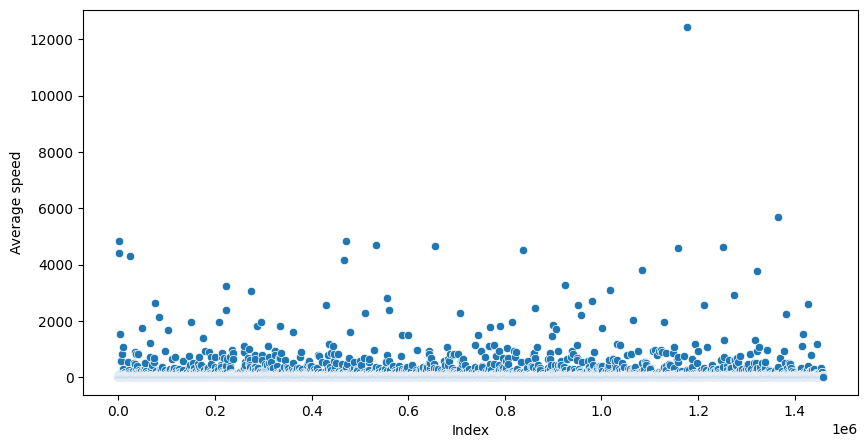

In [20]:
avg_speed = taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6
fig, ax = plt.subplots(figsize=(10, 5))
sns.scatterplot(x=avg_speed.index, y=avg_speed, ax=ax)
ax.set_xlabel('Index')
ax.set_ylabel('Average speed')

Как раз отсюда мы видим, что у нас есть “поездки-телепортации”, для которых средняя скорость более 1000 км/ч. Даже есть такая, средняя скорость которой составляла более 12000 км/ч! 

Давайте условимся, что предельная средняя скорость, которую могут развивать таксисты будет 300 км/ч. 


### Задание 2.11.
Найдите поездки, длительность которых превышает 24 часа. И удалите их из набора данных.

а) Сколько выбросов по признаку длительности поездки вам удалось найти?

Найдите поездки, средняя скорость которых по кратчайшему пути превышает 300 км/ч и удалите их из данных. 

б) Сколько выбросов по признаку скорости вам удалось найти?

In [21]:
print("Количество выбросов по признаку длительности поездки: {:.0f} \n" .format(taxi_data[taxi_data['trip_duration'] > 86400].shape[0]))

print("Количество выбросов по признаку скорости: {:.0f}" .format(avg_speed[avg_speed > 300].shape[0]))

mask_1 = taxi_data['trip_duration'] <= 86400
mask_2 = (taxi_data['total_distance'] / taxi_data['trip_duration'] * 3.6) <= 300
taxi_data = taxi_data[mask_1 & mask_2]

Количество выбросов по признаку длительности поездки: 4 

Количество выбросов по признаку скорости: 407


## 3. Разведывательный анализ данных (EDA)

В этой части нашего проекта мы с вами:
* Исследуем сформированный набор данных; 
* Попробуем найти закономерности, позволяющие сформулировать предварительные гипотезы относительно того, какие факторы являются решающими в определении длительности поездки;
* Дополним наш анализ визуализациями, иллюстрирующими; исследование. Постарайтесь оформлять диаграммы с душой, а не «для галочки»: навыки визуализации полученных выводов обязательно пригодятся вам в будущем.


Начинаем с целевого признака. Забегая вперед, скажем, что основной метрикой качества решения поставленной задачи будет RMSLE - Root Mean Squared Log Error, которая вычисляется на основе целевой переменной в логарифмическом масштабе. В таком случае целесообразно сразу логарифмировать признак длительности поездки и рассматривать при анализе логарифм в качестве целевого признака:
$$trip\_duration\_log = log(trip\_duration+1),$$
где под символом log подразумевается натуральный логарифм.


In [22]:
taxi_data['trip_duration_log'] = np.log(taxi_data['trip_duration']+1)

### Задание 3.1.
Постройте гистограмму и коробчатую диаграмму длительности поездок в логарифмическом масштабе (trip_duration_log). 
Исходя из визуализации, сделайте предположение, является ли полученное распределение нормальным? 
Проверьте свою гипотезу с помощью теста Д’Агостино при уровне значимости $\alpha=0.05$. 

а) Чему равен вычисленный p-value? Ответ округлите до сотых.

б) Является ли распределение длительности поездок в логарифмическом масштабе нормальным?

P-value = 0.0
Распределение отлично от нормального


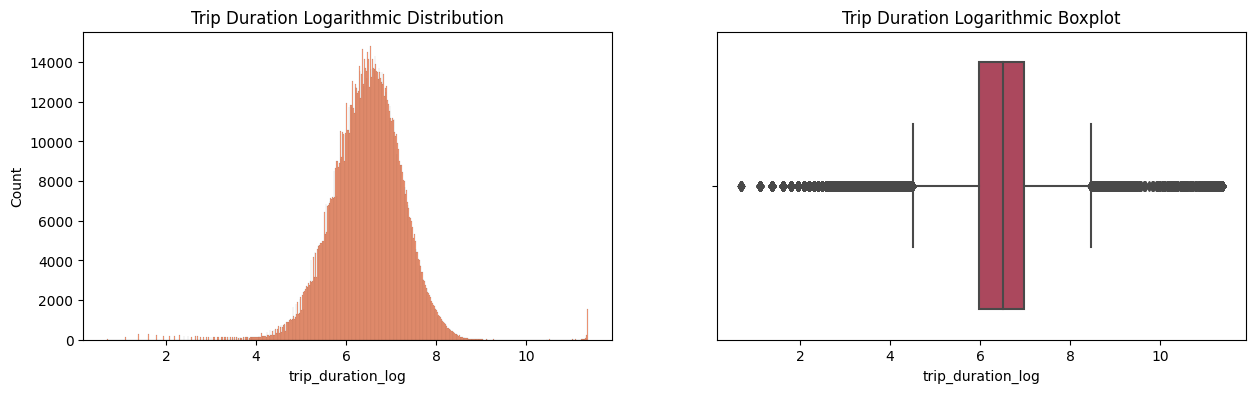

In [23]:
# строим гистограмму и коробчатую диаграмму
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
histplot = sns.histplot(data = taxi_data, x = 'trip_duration_log', ax = axes[0], color = 'coral')
histplot.set_title('Trip Duration Logarithmic Distribution')
boxplot = sns.boxplot(data = taxi_data, x = 'trip_duration_log', ax = axes[1], palette = 'inferno')
boxplot.set_title('Trip Duration Logarithmic Boxplot');

# формируем нулевую и альтернативную гипотезы для проверки данных на нормальность
H0 = 'Данные распределены нормально'
Ha = 'Распределение отлично от нормального'

# устанавливаем уровень значимости
alpha = 0.05

# тест Д'Агостино (возвращает двустороннюю вероятность для проверки гипотезы)
_, p = stats.normaltest(taxi_data['trip_duration_log'])
print(f'P-value = {round(p, 2)}')

# интерпритация полученного результата
if p > alpha / 2: # p-value рассчитано для двусторонней гипотезы, поэтому уровень значимости делим на 2
    print(H0)
else:
    print(Ha)

### Задание 3.2.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от таксопарка (vendor_id). 

Сравните два распределения между собой.

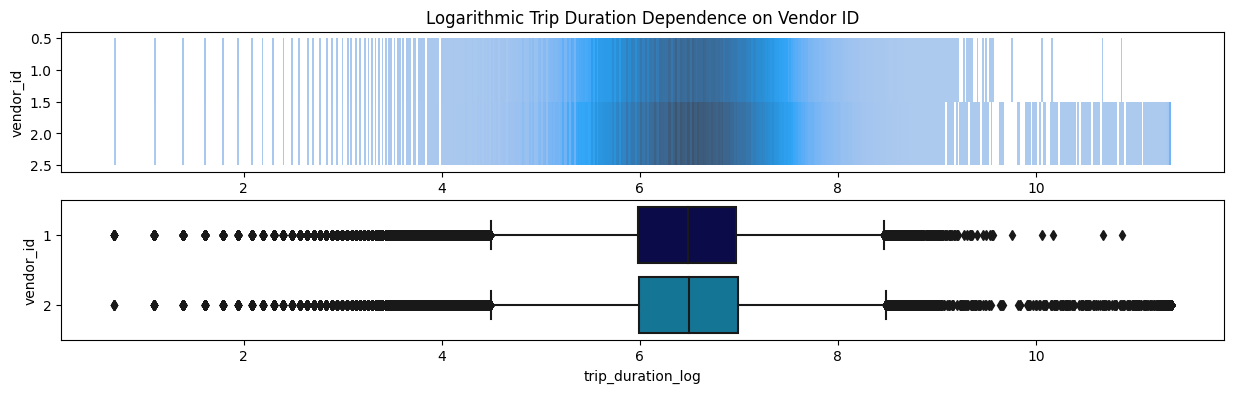

In [24]:
# преобразуем признак vendor_id в категориальный тип данных
taxi_data['vendor_id'] = taxi_data['vendor_id'].astype('category')

# строим гистограмму и коробчатую диаграмму
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 4))
histplot = sns.histplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'vendor_id',
    ax = axes[0]
)
histplot.set_title('Logarithmic Trip Duration Dependence on Vendor ID')
boxplot = sns.boxplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'vendor_id',
    ax = axes[1], palette = 'ocean'
)

>  **Вывод:**
> * Распределения в группах практически не отличаются, признак vendor_id не имеет значения при определении длительности поездки.

### Задание 3.3.
Постройте визуализацию, которая позволит сравнить распределение длительности поездки в логарифмическом масштабе (trip_duration_log) в зависимости от признака отправки сообщения поставщику (store_and_fwd_flag). 

Сравните два распределения между собой.

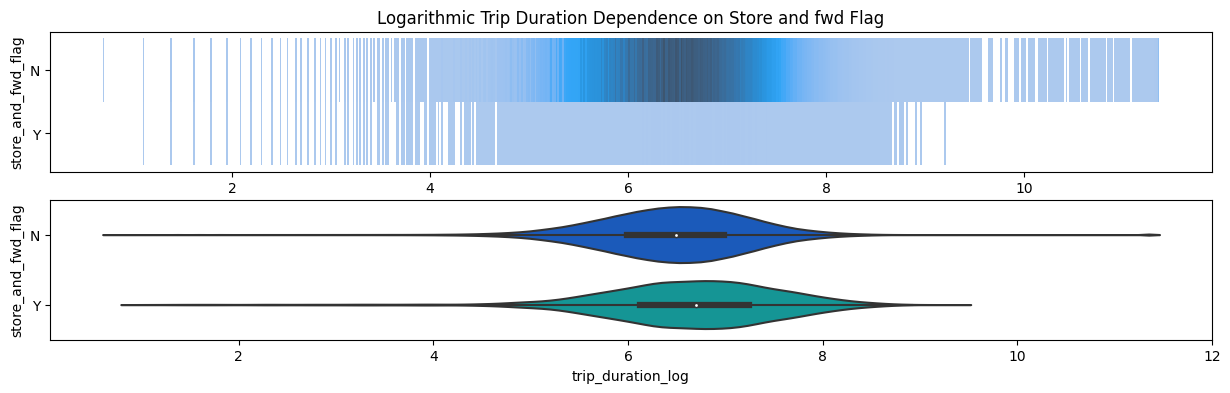

In [25]:
# на этот раз вместо boxplot построим violinplot
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (15, 4))

histplot = sns.histplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'store_and_fwd_flag',
    ax = axes[0]
)
histplot.set_title('Logarithmic Trip Duration Dependence on Store and fwd Flag')
violinplot = sns.violinplot(
    data = taxi_data,
    x = 'trip_duration_log',
    y = 'store_and_fwd_flag',
    ax = axes[1], palette = 'winter'
)

>**Выводы:**
> * Распределения в группах значительно отличаются, прзнак store_and_fwd_flag имеет значение при определении длительности поездки.
> * Наиболее длительные поездки принадлежат к группе N (не хранить и не пересылать поездку).
>
> 

### Задание 3.4.
Постройте две визуализации:
* Распределение количества поездок в зависимости от часа дня;
* Зависимость медианной длительности поездки от часа дня.

На основе построенных графиков ответьте на следующие вопросы:

а) В какое время суток такси заказывают реже всего?

б) В какое время суток наблюдается пик медианной длительности поездок?

Text(0, 0.5, 'median')

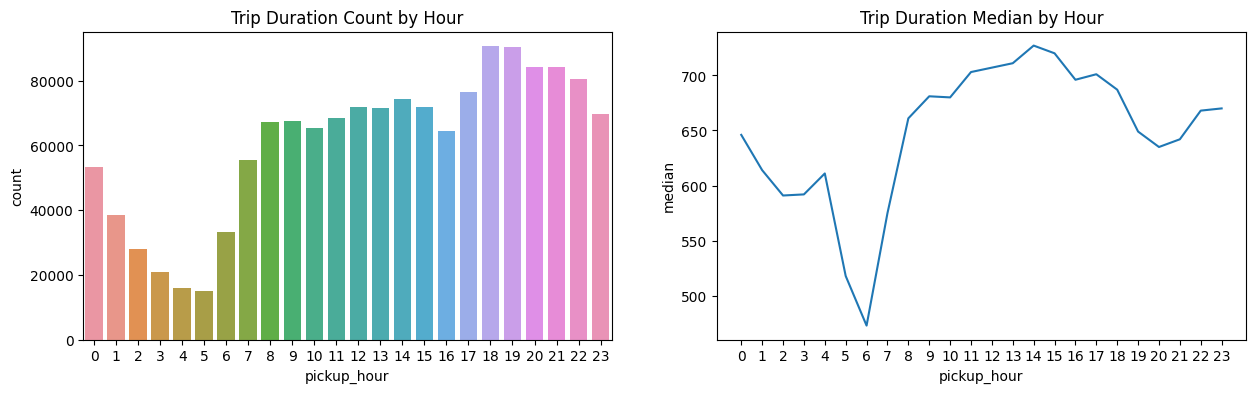

In [26]:
# группируем данные по часу и рассчитываем медианную длительность поездок
duration_by_hour = taxi_data.groupby('pickup_hour')['trip_duration'].median()

# строим графики
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
countplot = sns.countplot(data = taxi_data, x = 'pickup_hour', ax = axes[0])
countplot.set_title('Trip Duration Count by Hour')
lineplot = sns.lineplot(data = duration_by_hour, ax = axes[1])
lineplot.set_title('Trip Duration Median by Hour')
lineplot.xaxis.set_ticks(duration_by_hour.index)
lineplot.set_ylabel('median')

> #### Выводы
> * Реже всего такси заказывают с 2:00 до 6:00.
> * Пик медианной длительности поездок наблюдается с 13:00 до 15:00. 
>

### Задание 3.5.
Постройте две визуализации:
* Распределение количества поездок в зависимости от дня недели;
*  Зависимость медианной длительности поездки от дня недели.

На основе построенных графиков ответьте на следующие вопросы:
а) В какой день недели совершается больше всего поездок?
б) В какой день недели медианная длительность поездок наименьшая?


Text(0, 0.5, 'median')

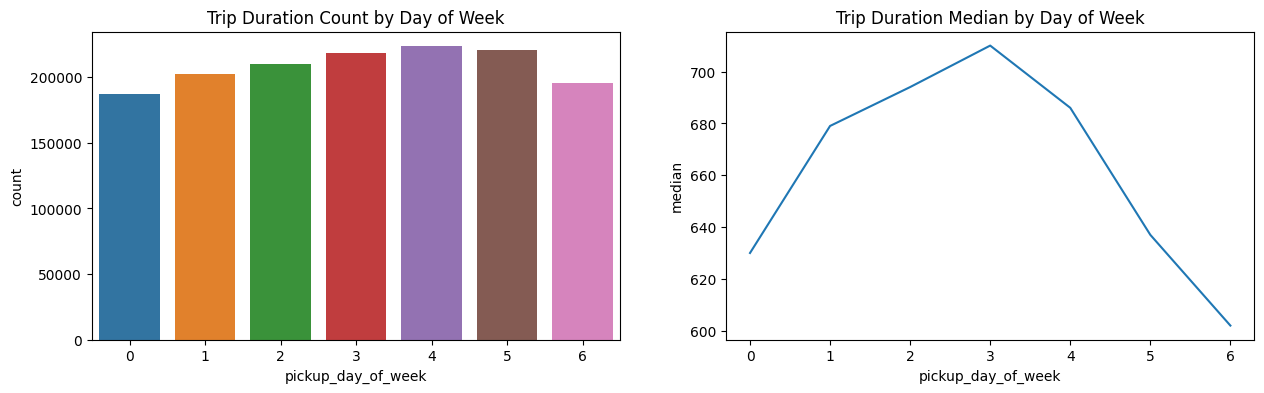

In [27]:
# группируем данные по дню недели и рассчитываем медианную длительность поездок
duration_by_day = taxi_data.groupby('pickup_day_of_week')['trip_duration'].median()

# строим графики
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 4))
countplot = sns.countplot(data = taxi_data, x = 'pickup_day_of_week', ax = axes[0])
countplot.set_title('Trip Duration Count by Day of Week')
lineplot = sns.lineplot(data = duration_by_day, ax = axes[1])
lineplot.set_title('Trip Duration Median by Day of Week')
lineplot.set_ylabel('median')

> #### Выводы
> * В пятницу совершается больше всего поездок.
> * В воскресенье медианная длительность поездок наименьшая.

### Задание 3.6.
Посмотрим на обе временные характеристики одновременно. 

Постройте сводную таблицу, по строкам которой отложены часы (pickup_hour), по столбцам - дни недели (pickup_day_of_week), а в ячейках - медианная длительность поездки (trip_duration). 

Визуализируйте полученную сводную таблицу с помощью тепловой карты (рекомендуемая палитра - coolwarm).

Text(0.5, 1.0, 'Длительности поездки в зависимости от временных характеристих')

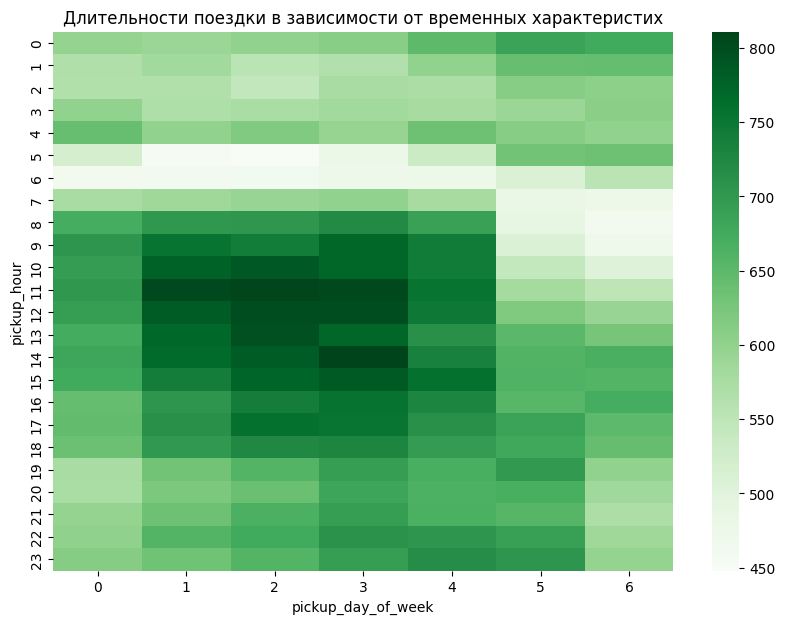

In [28]:
# строим сводную таблицу
pivot = taxi_data.pivot_table(
    values = 'trip_duration',
    index = 'pickup_hour',
    columns = 'pickup_day_of_week',
    aggfunc = 'median'
)

# визуализируем полученную таблицу
fig = plt.figure(figsize = (10, 7))
heatmap = sns.heatmap(data = pivot, cmap = 'Greens')
heatmap.set_title('Длительности поездки в зависимости от временных характеристих')

> #### Выводы
> * Самые прдолжительные поездки (в медианном смысле) наблюдаются с понедельника по пятницу в промежутке с 8 до 18 часов, это объяснимо , тк люди работают, 
> * Так же можно обратить внимание, что часом пик можно назвать 11:00, особенно с вторника по четверг 
> * Наибольшая медианная длительность поездки наблюдалась в четверг в 14 часов, и вторник, среда 11 часов.

### Задание 3.7.
Постройте две диаграммы рассеяния (scatter-диаграммы):
* первая должна иллюстрировать географическое расположение точек начала поездок (pickup_longitude, pickup_latitude) 
* вторая должна географическое расположение точек завершения поездок (dropoff_longitude, dropoff_latitude).

Для этого на диаграммах по оси абсцисс отложите широту (longitude), а по оси ординат - долготу (latitude). 
Включите в визуализацию только те точки, которые находятся в пределах Нью-Йорка - добавьте следующие ограничения на границы осей абсцисс и ординат:
 
city_long_border = (-74.03, -73.75)

city_lat_border = (40.63, 40.85)

Добавьте на диаграммы расцветку по десяти географическим кластерам (geo_cluster), которые мы сгенерировали ранее. 

**Рекомендация:** для наглядности уменьшите размер точек на диаграмме рассеяния.  


(40.63, 40.85)

C:\Users\tatye\AppData\Roaming\Python\Python310\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\tatye\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


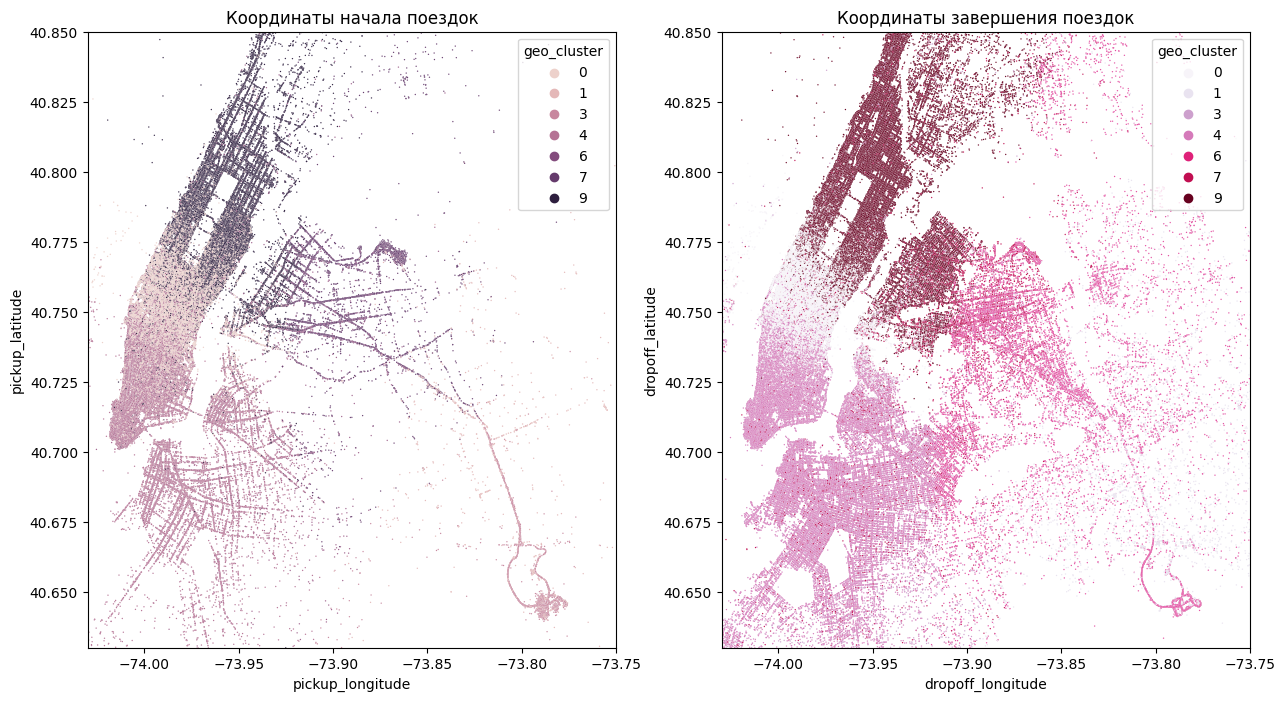

In [29]:
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# ограничения по осям
city_long_border = (-74.03, -73.75)
city_lat_border = (40.63, 40.85)

# строим диаграммы рассеяния
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 8))

scatter_pickup = sns.scatterplot(
    data = taxi_data,
    x = 'pickup_longitude',
    y = 'pickup_latitude',
    hue = 'geo_cluster',
    s = 1,
    ax = axes[0]
)
scatter_pickup.set_title('Координаты начала поездок')
scatter_pickup.set_xlim(city_long_border)
scatter_pickup.set_ylim(city_lat_border)

scatter_dropoff = sns.scatterplot(
    data = taxi_data,
    x = 'dropoff_longitude',
    y = 'dropoff_latitude',
    hue = 'geo_cluster',
    s = 1,
    ax = axes[1], palette = 'PuRd'
)
scatter_dropoff.set_title('Координаты завершения поездок')
scatter_dropoff.set_xlim(city_long_border)
scatter_dropoff.set_ylim(city_lat_border)

## 4. Отбор и преобразование признаков

Перед тем как перейти к построению модели, осталось сделать ещё несколько шагов.
* Следует помнить, что многие алгоритмы машинного обучения не могут обрабатывать категориальные признаки в их обычном виде. Поэтому нам необходимо их закодировать;
* Надо отобрать признаки, которые мы будем использовать для обучения модели;
*  Необходимо масштабировать и трансформировать некоторые признаки для того, чтобы улучшить сходимость моделей, в основе которых лежат численные методы.


In [30]:
print('Shape of data: {}'.format(taxi_data.shape))
print('Columns: {}'.format(taxi_data.columns))

Shape of data: (1458233, 27)
Columns: Index(['id', 'vendor_id', 'pickup_datetime', 'dropoff_datetime',
       'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'trip_duration', 'pickup_date', 'pickup_hour', 'pickup_day_of_week',
       'pickup_holiday', 'total_distance', 'total_travel_time',
       'number_of_steps', 'haversine_distance', 'direction', 'geo_cluster',
       'temperature', 'visibility', 'wind speed', 'precip', 'events',
       'trip_duration_log'],
      dtype='object')


Для удобства работы сделаем копию исходной таблицы с поездками:

In [31]:
train_data = taxi_data.copy()
train_data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,...,number_of_steps,haversine_distance,direction,geo_cluster,temperature,visibility,wind speed,precip,events,trip_duration_log
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,...,5.0,1.498521,99.970196,9,4.4,8.0,27.8,0.3,None,6.122493
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,...,6.0,1.805507,-117.153768,4,28.9,16.1,7.4,0.0,None,6.498282
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,...,16.0,6.385098,-159.680165,4,-6.7,16.1,24.1,0.0,None,7.661527
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,...,4.0,1.485498,-172.737700,4,7.2,16.1,25.9,0.0,None,6.063785
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,...,5.0,1.188588,179.473585,9,9.4,16.1,9.3,0.0,None,6.077642


### Задание 4.1.
Сразу позаботимся об очевидных неинформативных и избыточных признаках. 

а) Какой из признаков является уникальным для каждой поездки и не несет полезной информации в определении ее продолжительности?

б) Утечка данных (data leak) - это…

в) Подумайте, наличие какого из признаков в обучающем наборе данных создает утечку данных?

г) Исключите выбранные в пунктах а) и в) признаки из исходной таблицы с данными. Сколько столбцов в таблице у вас осталось?


In [32]:
# исключаем признаки id и dropoff_time из исходной таблицы с данными
train_data = train_data.drop(['id', 'dropoff_datetime'], axis = 1)

print("А) Уникальным для каждой поездки является её идентификатор — столбец id. Он никак не связан с длительностью поездки и не имеет значения при её прогнозировании. \n \n",
      "Б) Утечка данных (data leak) — это ситуация, в которой данные используемые для обучения модели, \n содержат прямую или косвенную информацию о целевой переменной, но эти данные недоступны в реальных условиях.\n \n",
      "В) В наших данных утечку создаёт признак dropoff_datetime — зафиксированное время остановки счётчика. \n Начиная поездку, мы никак не можем точно знать, когда она закончится, \n ведь мы как раз и пытаемся предсказать время окончания поездки. \n \n",
      "Г) В таблице осталось столбцов: {:.0f}" .format(train_data.shape[1])
)

А) Уникальным для каждой поездки является её идентификатор — столбец id. Он никак не связан с длительностью поездки и не имеет значения при её прогнозировании. 
 
 Б) Утечка данных (data leak) — это ситуация, в которой данные используемые для обучения модели, 
 содержат прямую или косвенную информацию о целевой переменной, но эти данные недоступны в реальных условиях.
 
 В) В наших данных утечку создаёт признак dropoff_datetime — зафиксированное время остановки счётчика. 
 Начиная поездку, мы никак не можем точно знать, когда она закончится, 
 ведь мы как раз и пытаемся предсказать время окончания поездки. 
 
 Г) В таблице осталось столбцов: 25


Ранее мы извлекли всю необходимую для нас информацию из даты начала поездки, теперь мы можем избавиться от этих признаков, так как они нам больше не понадобятся:


In [33]:
drop_columns = ['pickup_datetime', 'pickup_date']
train_data = train_data.drop(drop_columns, axis=1)
print('Shape of data:  {}'.format(train_data.shape))

Unexpected exception formatting exception. Falling back to standard exception


Traceback (most recent call last):
  File "C:\Users\tatye\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py", line 3460, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "C:\Users\tatye\AppData\Local\Temp\ipykernel_15060\4181047335.py", line 2, in <module>
    train_data = train_data.drop(drop_columns, axis=1)
  File "c:\Users\tatye\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\tatye\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py", line 5399, in drop
    return super().drop(
  File "c:\Users\tatye\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\util\_decorators.py", line 331, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\tatye\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\generic.py", line 4505, in drop
    obj = obj._drop_axis(labels, 

### Задание 4.2.
Теперь займёмся кодированием категориальных признаков. В наших данных к категориальным можно отнести следующие признаки:

vendor_id;
store_and_fwd_flag;
pickup_day_of_week;
geo_cluster;
events.
Первые два (vendor_id и store_and_fwd_flag) из них являются бинарными (имеют два уникальных значения). Давайте их закодируем



Закодируем признак vendor_id в таблице train_data таким образом, чтобы он был равен 0, если идентификатор таксопарка равен 1, и 1 — в противном случае.

Закодируем признак store_and_fwd_flag в таблице train_data таким образом, чтобы он был равен 0, если флаг выставлен в значение 'N', и 1 — в противном случае.

- а) Рассчитаем среднее по закодированному столбцу vendor_id. Ответ приведите с точностью до сотых.

- б) Рассчитаем среднее по закодированному столбцу store_and_fwd_flag. Ответ приведите с точностью до тысячных.



In [34]:
# кодируем признак vendor_id
train_data['vendor_id'] = train_data['vendor_id'].apply(
    lambda x: 0 if x == 1 else 1
).astype('int')

# кодируем признак store_and_fwd_flag
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].apply(
    lambda x: 0 if x == 'N' else 1
)

print("Среднее по столбцу vendor_id: {:.2f} \n" .format(train_data['vendor_id'].mean()))
print("Среднее по столбцу store_and_fwd_flag: {:.3f}" .format(train_data['store_and_fwd_flag'].mean())
      )

### Задание 4.3.
Создайте таблицу data_onehot из закодированных однократным кодированием признаков pickup_day_of_week, geo_cluster и events в таблице train_data с помощью OneHotEncoder из библиотеки sklearn. Параметр drop выставите в значение 'first', чтобы удалять первый бинарный столбец, тем самым не создавая излишних признаков.

В результате работы OneHotEncoder вы получите безымянный numpy-массив, который нам будет необходимо преобразовать обратно в DataFrame, для более удобной работы в дальнейшем. Чтобы получить имена закодированных столбцов у объекта типа OneHotEncoder есть специальный метод get_feature_names_out(). Он возвращает список новых закодированных имен столбцов в формате <оригинальное имя столбца>_<имя категории>.

Пример использования:

``` python
# Получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()
# Составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns=column_names)
```

В этом псевдокоде:
* one_hot_encoder - объект класса OneHotEncoder
* data_onehot - numpy-массив, полученный в результате трансформации кодировщиком

В результате выполнения задания у вас должен быть образован DataFrame `data_onehot`, который содержит кодированные категориальные признаки pickup_day_of_week, geo_cluster и events. 


Сколько бинарных столбцов у вас получилось сгенерировать с помощью однократного кодирования?


In [ ]:
# загружаем библиотеку
one_hot_encoder = preprocessing.OneHotEncoder(drop = 'first')

# колонки к преобразованию
columns_to_change = ['pickup_day_of_week', 'geo_cluster', 'events']

# 'учим' кодировщик и сразу кодируем данные
data_onehot = one_hot_encoder.fit_transform(
    train_data[columns_to_change]
).toarray() # результат переводим в массив

# получаем закодированные имена столбцов
column_names = one_hot_encoder.get_feature_names_out()

# составляем DataFrame из закодированных признаков
data_onehot = pd.DataFrame(data_onehot, columns = column_names)

print("Количество новых бинарных столбцов: {:.0f}" .format(data_onehot.shape[1]))

Количество новых бинарных столбцов: 18


Добавим полученную таблицу с закодированными признаками:

In [ ]:
train_data = pd.concat(
    [train_data.reset_index(drop=True).drop(columns_to_change, axis=1), data_onehot], 
    axis=1
)
print('Shape of data: {}'.format(train_data.shape))

Shape of data: (1458233, 38)


Теперь, когда категориальные признаки предобработаны, сформируем матрицу наблюдений X, вектор целевой переменной y и его логарифм y_log. В матрицу наблюдений войдут все столбцы из таблицы с поездками за исключением целевого признака trip_duration и его логарифмированной версии trip_duration_log:


In [ ]:
X = train_data.drop(['trip_duration', 'trip_duration_log'], axis=1)
y = train_data['trip_duration']
y_log = train_data['trip_duration_log']

Все наши модели мы будем обучать на логарифмированной версии y_log. 

Выбранный тип валидации - hold-out. Разобьем выборку на обучающую и валидационную в соотношении 67/33:

In [ ]:
X_train, X_valid, y_train_log, y_valid_log = model_selection.train_test_split(
    X, y_log, 
    test_size=0.33, 
    random_state=42
)

На данный момент у нас достаточно много признаков: скорее всего, не все из них будут важны. Давайте оставим лишь те, которые сильнее всего связаны с целевой переменной и точно будут вносить вклад в повышение качества модели.


### Задание 4.4.
С помощью SelectKBest отберите 25 признаков, наилучшим образом подходящих для предсказания целевой переменной в логарифмическом масштабе. Отбор реализуйте по обучающей выборке, используя параметр score_func = f_regression.

Укажите признаки, которые вошли в список отобранных


In [ ]:
# отбираем признаки
selector = feature_selection.SelectKBest(
    score_func = feature_selection.f_regression,
    k = 25
)
selector.fit(X_train, y_train_log)

# оставляем только полученные 25 признаков
best_features = selector.get_feature_names_out()
X_train = X_train[best_features]
X_valid = X_valid[best_features]

print('Признаки, которые вошли в список отобранных:\n', best_features)


Признаки, которые вошли в список отобранных:
 ['vendor_id' 'passenger_count' 'pickup_longitude' 'pickup_latitude'
 'dropoff_longitude' 'dropoff_latitude' 'store_and_fwd_flag' 'pickup_hour'
 'pickup_holiday' 'total_distance' 'total_travel_time' 'number_of_steps'
 'haversine_distance' 'temperature' 'pickup_day_of_week_1'
 'pickup_day_of_week_2' 'pickup_day_of_week_3' 'pickup_day_of_week_4'
 'pickup_day_of_week_5' 'pickup_day_of_week_6' 'geo_cluster_1'
 'geo_cluster_3' 'geo_cluster_5' 'geo_cluster_7' 'geo_cluster_9']


Так как мы будем использовать различные модели, в том числе внутри которых заложены численные методы оптимизации, то давайте заранее позаботимся о масштабировании факторов. 

Примечание. Есть разные варианты масштабирования. Мы будем использовать min-max-нормализацию. Помним, что нормализация требуется для предикторов, а не для целевой переменной.


### Задание 4.5.
Нормализуйте предикторы в обучающей и валидационной выборках с помощью MinMaxScaler из библиотеки sklearn. 

Рассчитаем среднее арифметическое для первого предиктора (т. е. для первого столбца матрицы) из валидационной выборки. Ответ округлим до сотых.


In [ ]:
# инициализируем нормализатор MinMaxScaler
mm_scaler = preprocessing.MinMaxScaler()

# преобразовываем данные
X_train = mm_scaler.fit_transform(X_train)
X_valid = mm_scaler.transform(X_valid)

print('Среднее арифметическое для первого предиктора из валидационной выборки: {:.2f}'.format(np.mean(X_valid[:, 0])))

# составляем DataFrame из массивов
X_train = pd.DataFrame(X_train, columns = best_features)
X_valid = pd.DataFrame(X_valid, columns = best_features)

Среднее арифметическое для первого предиктора из валидационной выборки: 0.54


## 5. Решение задачи регрессии: линейная регрессия и деревья решений

Определим метрику, по которой мы будем измерять качество наших моделей. Мы будем следовать канонам исходного соревнования на Kaggle и в качестве метрики использовать RMSLE (Root Mean Squared Log Error), которая вычисляется как:
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(log(y_i+1)-log(\hat{y_i}+1))^2},$$
где:
* $y_i$ - истинная длительность i-ой поездки на такси (trip_duration)
* $\hat{y_i}$- предсказанная моделью длительность i-ой поездки на такси

Заметим, что логарифмирование целевого признака мы уже провели заранее, поэтому нам будет достаточно вычислить метрику RMSE для модели, обученной прогнозировать длительность поездки такси в логарифмическом масштабе:
$$z_i=log(y_i+1),$$
$$RMSLE = \sqrt{\frac{1}{n}\sum_{i=1}^n(z_i-\hat{z_i})^2}=\sqrt{MSE(z_i,\hat{z_i})}$$ 



### Задание 5.1.
Постройте модель линейной регрессии на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# создаём объект класса LinearRegression
lr_model = linear_model.LinearRegression()

# обучаем модель - ищем параметры МНК
lr_model.fit(X_train, y_train_log)

# делаем предсказания
y_train_pred = lr_model.predict(X_train)
y_valid_pred = lr_model.predict(X_valid)

# рассчитываем RMSLE

print('RMSLE  на тренировочной выборке: {:.2f}\n'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))),
      'RMSLE  на валидационной выборке: {:.2f}\n'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred))))

RMSLE  на тренировочной выборке: 0.54
 RMSLE  на валидационной выборке: 0.54



### Задание 5.2.
Теперь давайте попробуем уменьшить ошибку прогноза, воспользовавшись полиномиальной регрессией ↓
Сгенерируйте полиномиальные признаки 2-ой степени с помощью PolynomialFeatures из библиотеки sklearn. Параметр include_bias выставите в значение False.

Постройте модель полиномиальной регрессии 2-ой степени на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию.

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
# создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree = 2, include_bias = False)
poly.fit(X_train)

# генерируем полиномиальные признаки
X_train_poly = poly.transform(X_train)
X_valid_poly = poly.transform(X_valid)

# строим модель полиномиальной регрессии
lr_poly = linear_model.LinearRegression()
lr_poly.fit(X_train_poly, y_train_log)
y_train_pred = lr_poly.predict(X_train_poly)
y_valid_pred = lr_poly.predict(X_valid_poly)

# рассчитываем RMSLE
print('RMSLE  на тренировочной выборке: {:.2f}\n'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))),
      'RMSLE  на валидационной выборке: {:.2f}\n'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred))))


RMSLE  на тренировочной выборке: 0.47
 RMSLE  на валидационной выборке: 0.70



### Задание 5.3.
Постройте модель полиномиальной регрессии 2-ой степени с L2-регуляризацией (регуляризация по Тихонову) на обучающей выборке  (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Коэффициент регуляризации $\alpha$ установите равным 1, остальные параметры оставьте по умолчанию.

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# создаём объект класса линейной регрессии с L2-регуляризацией
lr_ridge = linear_model.Ridge(alpha = 1)

# создаём генератор полиномиальных признаков
poly = preprocessing.PolynomialFeatures(degree = 2, include_bias = False)

In [ ]:
poly.fit(X_train)

# генерируем полиномиальные признаки
X_train_poly = poly.transform(X_train)
X_valid_poly = poly.transform(X_valid)

# обучаем модель
lr_ridge.fit(X_train_poly, y_train_log)

# делаем предсказания
y_train_pred = lr_ridge.predict(X_train_poly)
y_valid_pred = lr_ridge.predict(X_valid_poly)

# рассчитываем RMSLE
print('RMSLE  на тренировочной выборке: {:.2f}\n'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))),
      'RMSLE  на валидационной выборке: {:.2f}\n'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred))))

RMSLE  на тренировочной выборке: 0.48
 RMSLE  на валидационной выборке: 0.48



### Задание 5.4.
Постройте модель дерева решений (DecisionTreeRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). Все параметры оставьте по умолчанию. 

а) Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.

б) Наблюдаются ли у вашей модели признаки переобучения?


In [ ]:
# строим модель дерева решений
dt_reg = tree.DecisionTreeRegressor(random_state = 42)
dt_reg.fit(X_train, y_train_log)

# делаем предсказания
y_train_pred = dt_reg.predict(X_train)
y_valid_pred = dt_reg.predict(X_valid)

# рассчитываем RMSLE
print('RMSLE  на тренировочной выборке: {:.2f}\n'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))),
      'RMSLE  на валидационной выборке: {:.2f}\n'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred))))

RMSLE  на тренировочной выборке: 0.00
 RMSLE  на валидационной выборке: 0.57



> **Вывод**
> * У модели наблюдаются признаки переобучения.

### Задание 5.5.
Переберите все возможные варианты глубины дерева решений в диапазоне от 7 до 20:

max_depths = range(7, 20)

Параметр random_state задайте равным 42.

Постройте линейные графики изменения метрики RMSE на тренировочной и валидационной выборках в зависимости от значения параметра глубины дерева решений. 

а) Найдите оптимальное значение максимальной глубины дерева, для которой будет наблюдаться минимальное значение RMSLE на обучающей выборке, но при этом еще не будет наблюдаться переобучение (валидационная кривая еще не начинает возрастать).

б) Чему равно значение метрик RMSLE на тренировочной и валидационной выборках для дерева решений с выбранной оптимальной глубиной? Ответ округлите до сотых.


Оптимальная глубина дерева решений: 11
 RMSLE  на тренировочной выборке: 0.41
 RMSLE  на валидационной выборке: 0.43



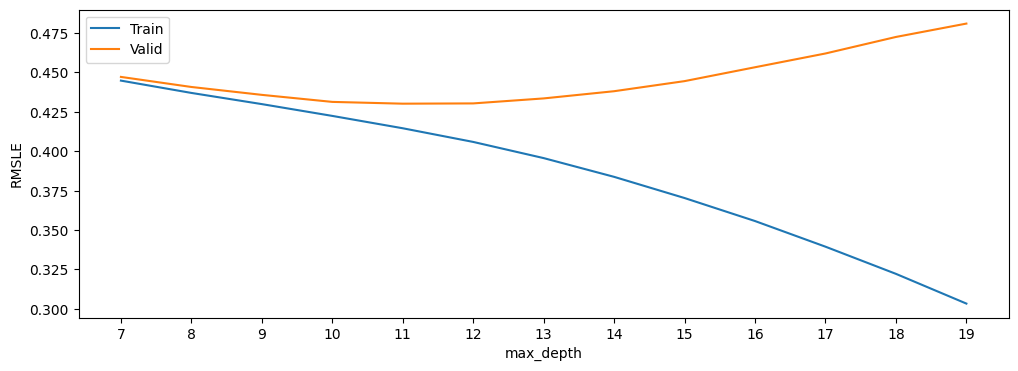

In [ ]:
# создаём список из 13 возможных значений от 7 до 20
max_depths = range(7, 20)

# создаём пустые списки, в которые будем добавлять результаты
train_scores = []
valid_scores = []

for depth in max_depths:
    # создаём объект класса DecisionTreeRegressor
    dt_reg = tree.DecisionTreeRegressor(max_depth = depth, random_state = 42)
    # обучаем модель
    dt_reg.fit(X_train, y_train_log)
    # делаем предсказание для тренировочной выборки
    y_train_pred = dt_reg.predict(X_train)
    # делаем предсказание для валидационной выборки
    y_valid_pred = dt_reg.predict(X_valid)
    # рассчитываем RMSLE для двух выборок и добавляем их в списки
    train_scores.append(
        np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))
    )
    valid_scores.append(
        np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred))
    )

# визуализируем изменения RMSLE в зависимости от max_depth
fig, ax = plt.subplots(figsize = (12, 4))          # фигура + координатная плоскость
ax.plot(max_depths, train_scores, label = 'Train') # линейный график для тренировочной выборки
ax.plot(max_depths, valid_scores, label = 'Valid') # линейный график для валидационной выборки
ax.set_xlabel('max_depth')                         # название оси абсцисс
ax.set_ylabel('RMSLE')                             # название оси ординат
ax.set_xticks(max_depths)                          # метки на оси абсцисс
ax.legend();                                       # отображение легенды

# извлекаем индекс лучшего RMSLE на валидационной выборке
best_index = valid_scores.index(min(valid_scores))

print('Оптимальная глубина дерева решений: {:.0f}\n'.format(max_depths[best_index]),
      'RMSLE  на тренировочной выборке: {:.2f}\n'.format(train_scores[best_index]),
      'RMSLE  на валидационной выборке: {:.2f}\n'.format(valid_scores[best_index]))

## 6. Решение задачи регрессии: ансамблевые методы и построение прогноза

Переходим к тяжелой артиллерии: ансамблевым алгоритмам. 

### Задание 6.1.

Постройте модель случайного леса на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* n_estimators=200,
* max_depth=12,
* criterion='squared_error',
* min_samples_split=20,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# создаём объект класса RandomForestRegressor
rf_reg = ensemble.RandomForestRegressor(
    n_estimators = 200,
    max_depth = 12,
    criterion = 'squared_error',
    min_samples_split = 20,
    random_state = 42,
    n_jobs = -1
)

# обучаем модель
rf_reg.fit(X_train, y_train_log)

# делаем предсказания
y_train_pred = rf_reg.predict(X_train)
y_valid_pred = rf_reg.predict(X_valid)

# рассчитываем RMSLE

print('RMSLE  на тренировочной выборке: {:.2f}\n'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))),
      'RMSLE  на валидационной выборке: {:.2f}\n'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred))))

RMSLE  на тренировочной выборке: 0.40
 RMSLE  на валидационной выборке: 0.41



### Задание 6.2.
Постройте модель градиентного бустинга над деревьями решений (GradientBoostingRegressor) на обучающей выборке (факторы должны быть нормализованы, целевую переменную используйте в логарифмическом масштабе). В качестве гиперпараметров укажите следующие:
* learning_rate=0.5,
* n_estimators=100,
* max_depth=6, 
* min_samples_split=30,
* random_state=42

Для полученной модели рассчитайте метрику RMSLE на тренировочной и валидационной выборках. Ответ округлите до сотых.


In [ ]:
# создаём объект класса GradientBoostingRegressor
gb_reg = ensemble.GradientBoostingRegressor(
    learning_rate = 0.5,
    n_estimators = 100,
    max_depth = 6,
    min_samples_split = 30,
    random_state = 42
)

# обучаем модель
gb_reg.fit(X_train, y_train_log)

# делаем предсказания
y_train_pred = gb_reg.predict(X_train)
y_valid_pred = gb_reg.predict(X_valid)

# рассчитываем RMSLE

print('RMSLE  на тренировочной выборке: {:.2f}\n'.format(np.sqrt(metrics.mean_squared_error(y_train_log, y_train_pred))),
      'RMSLE  на валидационной выборке: {:.2f}\n'.format(np.sqrt(metrics.mean_squared_error(y_valid_log, y_valid_pred))))

RMSLE  на тренировочной выборке: 0.37
 RMSLE  на валидационной выборке: 0.39



### Задание 6.3.
Какая из построенных вами моделей показала наилучший результат (наименьшее значение RMSLE на валидационной выборке)?
* Линейная регрессия
* Полиномиальная регрессия 2ой степени
* Дерево решений
* Случайный лес
* Градиентный бустинг над деревьями решений


### Задание 6.4.
Постройте столбчатую диаграмму коэффициентов значимости каждого из факторов.

Укажите топ-3 наиболее значимых для предсказания целевого признака - длительности поездки в логарифмическом масштабе - факторов.


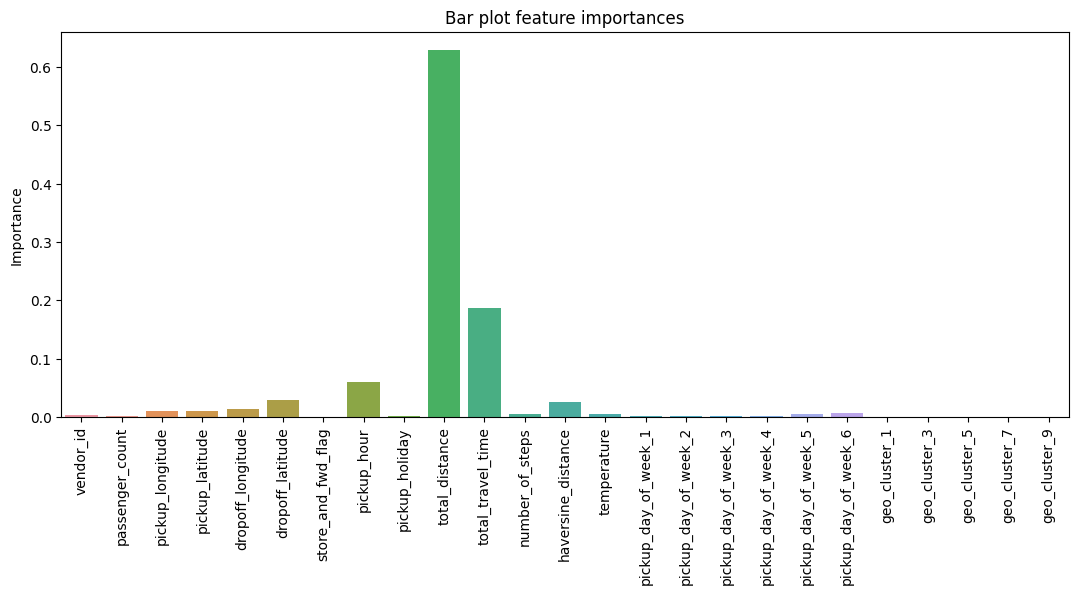

In [ ]:
fig, ax = plt.subplots(figsize = (13, 5)) # фигура + координатная плоскость
features = X_train.columns                # признаки
importances = gb_reg.feature_importances_ # важность признаков

# строим столбчатую диаграмму
sns.barplot(x = features, y = importances, ax = ax)
ax.set_title('Bar plot feature importances') # название графика
ax.set_ylabel('Importance')                  # название оси ординат
ax.xaxis.set_tick_params(rotation = 90)      # поворот меток на оси абсцисс

### Задание 6.5.

Несмотря на все преимущества, у метрики RMSLE есть один недостаток — она не является интерпретируемой. Нам хотелось бы понять, насколько наша итоговая модель хорошо предсказывает целевой признак с точки зрения бизнес-процесса. Точнее, мы бы хотели получить более понятное представление об ошибке прогноза длительности поездки.


Для лучшей из построенных моделей рассчитайте медианную абсолютную ошибку (MeAE - в sklearn функция median_absolute_error) предсказания длительности поездки такси на валидационной выборке:
$$ MeAE = median(|y_i-\hat{y_i}|)$$

Значение метрики MeAE переведите в минуты и округлите до десятых.


In [ ]:
# переводим из логарифимического маштаба в изначальный
y_valid = np.exp(y_valid_log) - 1
y_valid_pred_exp = np.exp(y_valid_pred) - 1

# рассчитываем медианную абсолютную ошибку
meae_valid = metrics.median_absolute_error(y_valid, y_valid_pred_exp)

# переводим значение метрики в минуты и округляем

print('MeAE на валидационной выборке: {:.1f} мин'.format(meae_valid / 60, 1))

MeAE на валидационной выборке: 1.8 мин


Финальный шаг - сделать submit -  предсказание для отложенного тестового набора данных. 

Прочитаем тестовые данные и заранее выделим столбец с идентификаторами поездок из тестового набора данных. Он нам еще пригодится:


In [ ]:
test_data = pd.read_csv("data/test.csv")
osrm_data_test = pd.read_csv("data/osrm_data_test.csv")
test_id = test_data['id']

Перед созданием прогноза для тестовой выборки необходимо произвести все манипуляции с данными, которые мы производили с тренировочной выборкой, а именно:
* Перевести признак pickup_datetime в формат datetime;
* Добавить новые признаки (временные, географические, погодные и другие факторы);
* Произвести очистку данных от пропусков;
* Произвести кодировку категориальных признаков:
    * Закодировать бинарные признаки;
    * Закодировать номинальные признаки с помощью обученного на тренировочной выборке OneHotEncoder’а;
* Сформировать матрицу наблюдений, оставив в таблице только те признаки, которые были отобраны с помощью SelectKBest;
* Нормализовать данные с помощью обученного на тренировочной выборке MinMaxScaler’а.


In [ ]:
test_data['pickup_datetime']=pd.to_datetime(test_data['pickup_datetime'],format='%Y-%m-%d %H:%M:%S')
test_data = add_datetime_features(test_data)
test_data = add_holiday_features(test_data, holiday_data)
test_data = add_osrm_features(test_data, osrm_data_test)
test_data = add_geographical_features(test_data)
test_data = add_cluster_features(test_data, kmeans)
test_data = add_weather_features(test_data, weather_data)
test_data = fill_null_weather_data(test_data)

test_data['vendor_id'] = test_data['vendor_id'].apply(lambda x: 0 if x == 1 else 1)
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].apply(lambda x: 0 if x == 'N' else 1)
test_data_onehot = one_hot_encoder.fit_transform(test_data[columns_to_change]).toarray()
column_names = one_hot_encoder.get_feature_names_out(columns_to_change)
test_data_onehot = pd.DataFrame(test_data_onehot, columns=column_names)

test_data = pd.concat(
    [test_data.reset_index(drop=True).drop(columns_to_change, axis=1), test_data_onehot], 
    axis=1
)
X_test = test_data[best_features]
X_test_scaled = mm_scaler.transform(X_test)
print('Shape of data: {}'.format(X_test.shape))

NameError: name 'pd' is not defined

Только после выполнения всех этих шагов можно сделать предсказание длительности поездки для тестовой выборки. Не забудьте перевести предсказания из логарифмического масштаба в истинный, используя формулу:
$$y_i=exp(z_i)-1$$

После того, как вы сформируете предсказание длительности поездок на тестовой выборке вам необходимо будет создать submission-файл в формате csv, отправить его на платформу Kaggle и посмотреть на результирующее значение метрики RMSLE на тестовой выборке.

Код для создания submission-файла:


In [ ]:
# ваш код здесь
submission = pd.DataFrame({'id': test_id, 'trip_duration': y_test_predict})
submission.to_csv('data/submission_gb.csv', index=False)

### **В качестве бонуса**

В завершение по ансамблевым мы предлагаем вам попробовать улучшить свое предсказание, воспользовавшись моделью экстремального градиентного бустинга (XGBoost) из библиотеки xgboost.

**XGBoost** - современная модель машинного обучения, которая является продолжением идеи градиентного бустинга Фридмана. У нее есть несколько преимуществ по сравнению с классической моделью градиентного бустинга из библиотеки sklearn: повышенная производительность путем параллелизации процесса обучения, повышенное качество решения за счет усовершенствования алгоритма бустинга, меньшая склонность к переобучению и широкий функционал возможности управления параметрами модели.


Для ее использования необходимо для начала установить пакет xgboost:

In [ ]:
#!pip install xgboost

После чего модуль можно импортировать:

In [ ]:
import xgboost as xgb

Перед обучением модели необходимо перевести наборы данных в тип данных xgboost.DMatrix:

In [ ]:
# Создание матриц наблюдений в формате DMatrix
dtrain = xgb.DMatrix(X_train_scaled, label=y_train_log, feature_names=best_features)
dvalid = xgb.DMatrix(X_valid_scaled, label=y_valid_log, feature_names=best_features)
dtest = xgb.DMatrix(X_test_scaled, feature_names=best_features)

Обучение модели XGBoost происходит с помощью метода train, в который необходимо передать параметры модели, набор данных, количество базовых моделей в ансамбле, а также дополнительные параметры:


In [ ]:
# Гиперпараметры модели
xgb_pars = {'min_child_weight': 20, 'eta': 0.1, 'colsample_bytree': 0.9, 
            'max_depth': 6, 'subsample': 0.9, 'lambda': 1, 'nthread': -1, 
            'booster' : 'gbtree', 'eval_metric': 'rmse', 'objective': 'reg:squarederror'
           }
# Тренировочная и валидационная выборка
watchlist = [(dtrain, 'train'), (dvalid, 'valid')]
# Обучаем модель XGBoost
model = xgb.train(
    params=xgb_pars, #гиперпараметры модели
    dtrain=dtrain, #обучающая выборка
    num_boost_round=300, #количество моделей в ансамбле
    evals=watchlist, #выборки, на которых считается матрица
    early_stopping_rounds=20, #раняя остановка
    maximize=False, #смена поиска максимума на минимум
    verbose_eval=10 #шаг, через который происходит отображение метрик
)

Предсказать целевой признак на новых данных можно с помощью метода predict():

In [ ]:
#Делаем предсказание на тестовом наборе данных
y_test_predict = np.exp(model.predict(dtest)) - 1
print('Modeling RMSLE %.5f' % model.best_score)

Также как и все модели, основанные на использовании деревьев решений в качестве базовых моделей, XGBoost имеет возможность определения коэффициентов важности факторов. Более того, в библиотеку встроена возможность визуализации важность факторов в виде столбчатой диаграммы. За эту возможность отвечает функция plot_importance():


In [ ]:
fig, ax = plt.subplots(figsize = (15,15))
xgb.plot_importance(model, ax = ax, height=0.5)